# 1 - Beginner - Plot ALBEDOs from SMARTS

##### Generate & Plot Albedos from SMARTS
###### &ensp;&ensp;&ensp;&ensp; * Plot Ground Albedo AM 1.0
###### &ensp;&ensp;&ensp;&ensp; * Plot Ground Albedo for SRRL Data, Oct 21 2020 at 12:45 PM
> Generate spectras for albedo and plot them, for different airmass / weather data:


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import pvlib
import datetime
import pprint
import os

In [2]:
plt.rcParams['timezone'] = 'Etc/GMT+7'
font = {'family' : 'DejaVu Sans',
'weight' : 'normal',
'size'   : 22}
plt.rc('font', **font)
plt.rcParams['figure.figsize'] = (12, 5)


In [3]:
import pySMARTS

In [4]:
pySMARTS.__version__

'0+untagged.17.ga4c2078'

#### Real Input data from SRRL for OCTOBER 21st, 12:45 PM

# Plot Albedos from SMARTS

In [5]:
IOUT = '30' # Albedo

#### Plot Ground Albedo AM 1.0

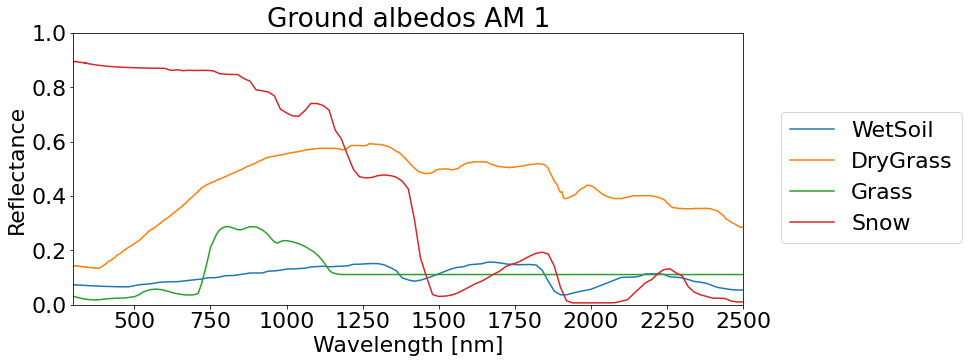

In [6]:
materials = ['WetSoil', 'DryGrass', 'Grass', 'Snow']

alb_db = pd.DataFrame()

for i in range (0, len(materials)):

    alb = pySMARTS.SMARTSAirMass(IOUT=IOUT, AMASS='1.0', material=materials[i])

    alb_db[materials[i]] = alb[alb.keys()[1]]
    
alb_db.index = alb.Wvlgth

alb_db_10 = alb_db

for col in alb_db:
    alb_db[col].plot(legend=True)
plt.xlabel('Wavelength [nm]')
plt.xlim([300, 2500])
plt.ylim([0,1])
plt.ylabel('Reflectance')
plt.legend(bbox_to_anchor=(1.04,0.75), loc="upper left")
plt.title('Ground albedos AM 1')
plt.show()

# Plot Ground Albedo for SRRL Data, Oct 21 2020 at 12:45 PM

###  Real Input data from SRRL for OCTOBER 21st, 12:45 PM

In [7]:
alb = 0.2205
YEAR='2020'; MONTH='10'; DAY='21'; HOUR = '12.75' 
LATIT='39.74'; LONGIT='-105.17'; ALTIT='1.0'; ZONE='-7'
TILT='33.0';  WAZIM='180.0'; HEIGHT='0' 
material='DryGrass'
min_wvl='280'; Max_wvl='4000'

TAIR = '20.3'
RH = '2.138'
SEASON = 'WINTER'
TDAY = '12.78'
SPR = '810.406'
RHOG = '0.2205'

WAZIMtracker = '270'
TILTtracker = '23.37'
tracker_tetha_bifrad = '-23.37'

TAU5='0.18422'     # SRRL-GRAL "Broadband Turbidity"
TAU5 = '0.037'    # SRRL-AOD [500nm]
GG = '0.7417'     # SSRL-AOD Asymmetry [500nm]
BETA = '0.0309'   # SRRL-AOD Beta
ALPHA = '0.1949'  # SRRL-AOD Alpha [Angstrom exp]
OMEGL = '0.9802'  # SRRL-AOD SSA [500nm]
W = str(7.9/10)   # SRRL-PWD  Precipitable Water [mm]

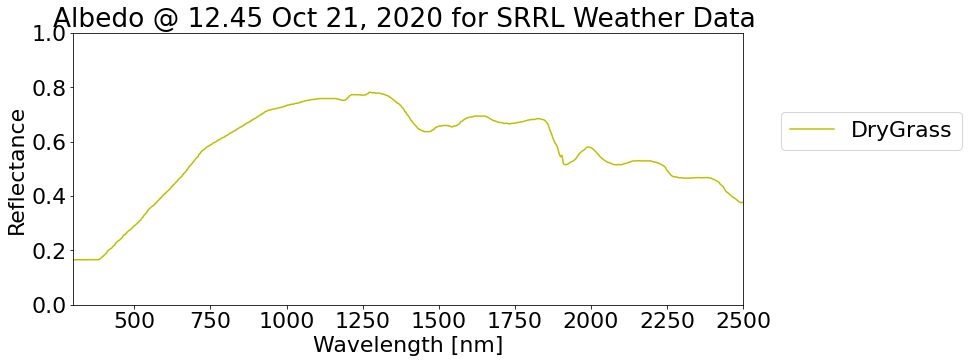

In [8]:
material = 'DryGrass'

alb_db = pd.DataFrame()

alb = pySMARTS.SMARTSSRRL(
    IOUT=IOUT, YEAR=YEAR, MONTH=MONTH,DAY=DAY, HOUR='12.45', LATIT=LATIT, 
    LONGIT=LONGIT, ALTIT=ALTIT, 
    ZONE=ZONE, W=W, RH=RH, TAIR=TAIR, 
    SEASON=SEASON, TDAY=TDAY, TAU5=None, SPR=SPR, 
    TILT=TILT, WAZIM=WAZIM,
    ALPHA1 = ALPHA, ALPHA2 = 0, OMEGL = OMEGL,
    GG = GG, BETA = BETA,
    RHOG=RHOG, HEIGHT=HEIGHT, material=material, POA = True)

alb_db[material] = alb[alb.keys()[1]]   
alb_db.index = alb.Wvlgth

alb_db[material].plot(legend=True, color='y')
plt.xlabel('Wavelength [nm]')
plt.xlim([300, 2500])
plt.ylim([0,1])
plt.ylabel('Reflectance')
plt.legend(bbox_to_anchor=(1.04,0.75), loc="upper left")
plt.title('Albedo @ 12.45 Oct 21, 2020 for SRRL Weather Data ')
plt.show()
